In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jinja2
import os

from matplotlib.dates import DateFormatter

from load_wastewater_data import *

# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [12]:
# define experiment to be preprocessed
experiment_series = "2024_04_03"

substance = "COVID" # one of PMMoV, COVID
rain_scenarios = ["Nieselregen", "MittelstarkerRegen"]
degradation_settings = ["no_decay", "linear_decay_dynamics"]  # one of "no_decay", "linear_decay_dynamics", "constant_decay_dynamics"

normalization = "PMMoV_normalization"

In [13]:
df = pd.DataFrame()
for rain_scenario in rain_scenarios:
    for degradation_setting in degradation_settings:
        df_metrics = pd.read_csv(os.path.join("../data", normalization, f"metrics_{degradation_setting}_{rain_scenario}.csv"))
        df_metrics["degradation_setting"] = degradation_setting
        df_metrics["rain_scenario"] = rain_scenario
        df = pd.concat([df, df_metrics], ignore_index=True)


In [14]:
df["difference_in_errors"] = df["absolute_error"] - df["absolute_error_unnormalized"]

In [16]:
# print Latex table of metric values
print(df.loc[(df.sampling_point == 16),:].groupby(["degradation_setting", "rain_scenario"]).mean()[["sampling_point", "absolute_error", "absolute_error_unnormalized", "difference_in_errors"]].to_latex())

\begin{tabular}{llrrrr}
\toprule
 &  & sampling_point & absolute_error & absolute_error_unnormalized & difference_in_errors \\
degradation_setting & rain_scenario &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{linear_decay_dynamics} & MittelstarkerRegen & 16.000000 & 80.395335 & 100.674015 & -20.278680 \\
 & Nieselregen & 16.000000 & 15.341922 & 17.674551 & -2.332629 \\
\cline{1-6}
\multirow[t]{2}{*}{no_decay} & MittelstarkerRegen & 16.000000 & 66.076890 & 142.164029 & -76.087138 \\
 & Nieselregen & 16.000000 & 16.529288 & 16.225878 & 0.303411 \\
\cline{1-6}
\bottomrule
\end{tabular}



/tmp/ipykernel_14721/1673492311.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


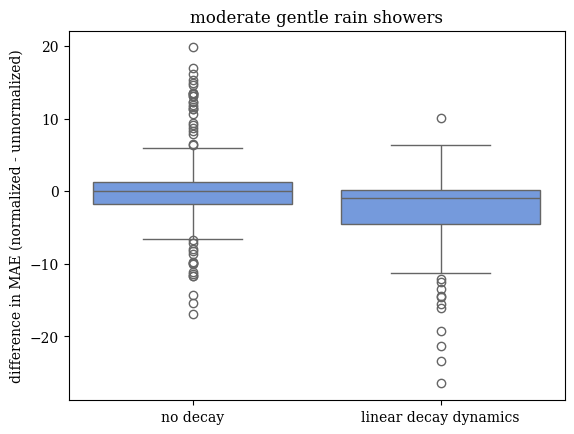

In [17]:
# Assuming df_sub is already defined
df_sub = df.loc[(df.sampling_point == 16) & (df.rain_scenario == "Nieselregen"), :]

# Create the boxplot
fig, ax = plt.subplots()
sns.boxplot(x="degradation_setting", y="difference_in_errors", data=df_sub, ax=ax, color="cornflowerblue")

# Set y-axis label
ax.set_ylabel("difference in MAE (normalized - unnormalized)")
ax.set_xlabel("")

# Set new x-axis labels
new_labels = ['no decay', 'linear decay dynamics']
ax.set_xticklabels(new_labels)

# Display the plot
plt.title("moderate gentle rain showers")
plt.show()

/tmp/ipykernel_14721/1293705676.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


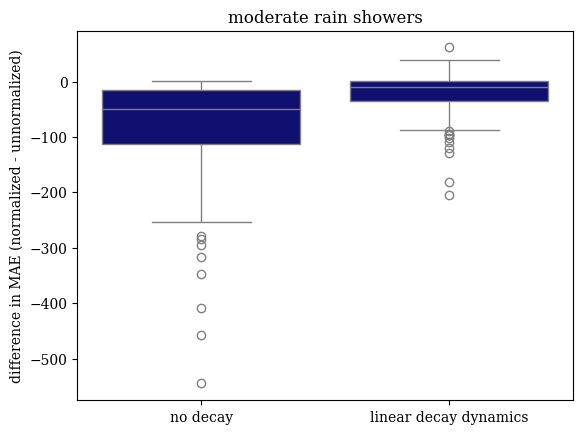

In [18]:
# Assuming df_sub is already defined
df_sub = df.loc[(df.sampling_point == 16) & (df.rain_scenario == "MittelstarkerRegen"), :]

# Create the boxplot
fig, ax = plt.subplots()
sns.boxplot(x="degradation_setting", y="difference_in_errors", data=df_sub, ax=ax, color="navy", linecolor="grey")

# Set y-axis label
ax.set_ylabel("difference in MAE (normalized - unnormalized)")
ax.set_xlabel("")

# Set new x-axis labels
new_labels = ['no decay', 'linear decay dynamics']
ax.set_xticklabels(new_labels)

# Display the plot
plt.title("moderate rain showers")
plt.show()